In [7]:
# 데이터 크롤링 + 머신러닝(+딥러닝)
# 데이터분할, 데이터표준화

from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

fish = pd.read_csv("/content/fish.csv")

data = fish[['length', 'weight']].to_numpy()
target = fish['target'].to_numpy()

model = KNeighborsClassifier() # 모델 생성
model.fit(data, target)

KNeighborsClassifier()

In [8]:
a = [[40, 500]]
model.predict(a)

array(['bream'], dtype=object)

In [10]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(data, target, test_size = 0.2)

model = KNeighborsClassifier()
model.fit(train_x, train_y)

KNeighborsClassifier()

In [11]:
model.score(test_x, test_y)

1.0

In [12]:
pred = model.predict(test_x)
pred # 예측값

array(['smelt', 'bream', 'bream', 'smelt', 'bream', 'bream', 'bream',
       'smelt', 'bream', 'bream'], dtype=object)

In [13]:
test_y # 실제값

array(['smelt', 'bream', 'bream', 'smelt', 'bream', 'bream', 'bream',
       'smelt', 'bream', 'bream'], dtype=object)

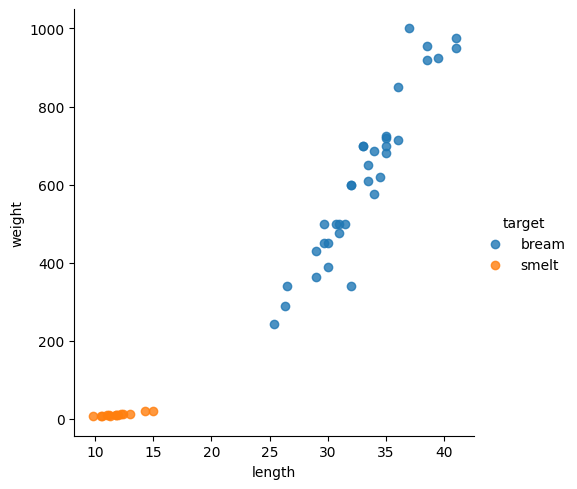

In [17]:
import seaborn as sns

sns.lmplot(data = fish, x = 'length', y = 'weight', hue = 'target', fit_reg = False)

In [18]:
a = [[25, 150]]
model.predict(a)

array(['smelt'], dtype=object)

In [20]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler() # 평균과 표준편차
train_scaled = ss.fit_transform(train_x) # 훈련데이터의 평균과 표준편차
test_scaled = ss.transform(test_x) # 시험데이터에 훈련데이터의 평균과 표준편차

In [21]:
model = KNeighborsClassifier()
model.fit(train_scaled, train_y)

KNeighborsClassifier()

In [22]:
model.score(test_scaled, test_y)

1.0

In [24]:
# 분류 모델: 정확도, 정밀도(컴퓨터가 예측한것들 중에서 몇개 맞았나)
# 재현율(실제 도미들중에서 컴퓨터가 잡아낸 도미가 총 몇%), F1-Score(정밀도, 재현율을 평균)
# ChatGPT(X), 인터넷검색(X), Slack통한 메시지(X) : 파일 + 교안내용 (O)

from sklearn.metrics import classification_report

pred = model.predict(test_scaled)

report = classification_report(test_y, pred) # 순서중요! (실제값, 예측값)
print(report)

              precision    recall  f1-score   support

       bream       1.00      1.00      1.00         7
       smelt       1.00      1.00      1.00         3

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



In [26]:
# 회귀 모델
bike = pd.read_csv("bike.csv") # 공공자전거 수요 데이터
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  count       10886 non-null  int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 935.6+ KB


In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

x = bike.iloc[:, 1:-1]
y = bike['count']

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.2)

ss = StandardScaler()
train_scaled = ss.fit_transform(train_x)
test_scaled = ss.transform(test_x)

rf = RandomForestRegressor()
rf.fit(train_scaled, train_y)
rf.score(test_scaled, test_y) # 회귀모델 : R^2 (실제값과 예측값의 분산 차이) // 실제값과 예측값 사이의 오차가 약 35%

0.6518826215740918

In [33]:
# R^2, MAE, MSE, RMSE
from sklearn.metrics import mean_absolute_error, mean_squared_error

pred = rf.predict(test_scaled) # 예측값

mae = mean_absolute_error(test_y, pred)
mse = mean_squared_error(test_y, pred)
rmse = mse ** (1/2)

print(mae, mse, rmse)

68.1763042203817 11144.214494614575 105.56616169310398


In [30]:
rf.predict(test_scaled) # 예측값

array([137.1       , 254.93      ,   9.96583333, ..., 417.04      ,
       187.16      , 558.78      ])

In [31]:
test_y # 실제값

6389    214
9014    121
432       3
294     162
4780      7
       ... 
2184     98
1469      7
6648    368
2462    207
9272    671
Name: count, Length: 2178, dtype: int64

In [44]:
bike = pd.read_csv("bike.csv")
bike['datetime'] = pd.to_datetime(bike['datetime'])

bike["Year"] = bike['datetime'].dt.year
bike["Month"] = bike['datetime'].dt.month
bike["Day"] = bike['datetime'].dt.day
bike["Hour"] = bike['datetime'].dt.hour

bike = bike.drop("datetime", axis = 1)

x = bike.drop("count", axis = 1)
y = bike['count']

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.2)

rf = RandomForestRegressor()
rf.fit(train_x, train_y)
rf.score(test_x, test_y)

0.9676291083721835

In [45]:
pred = rf.predict(test_x)
pred

array([122.83,  74.85, 154.28, ..., 287.06,  17.42, 125.49])

In [46]:
test_y

581     118
5741     81
2568    188
8046    377
1101     34
       ... 
4758    258
3331    527
7179    244
2595     17
865     119
Name: count, Length: 2178, dtype: int64

In [47]:
mae = mean_absolute_error(test_y, pred)
mse = mean_squared_error(test_y, pred)
rmse = mse ** (1/2)

print(mae, mse, rmse)

20.687001836547292 1079.4374007805327 32.854792660744835


In [49]:
train_scaled.shape

(8708, 9)

In [52]:
from tensorflow import keras

model = keras.Sequential()
model.add(keras.layers.Dense(32, activation = 'relu', input_shape = (9,)))
model.add(keras.layers.Dense(16, activation = 'relu'))
model.add(keras.layers.Dense(2, activation = 'softmax'))

model.compile(loss = 'mse', metrics = ['mae'], optimizer = 'adam')

model.fit(train_scaled, train_y, epochs = 100, validation_data = (test_scaled, test_y))

Epoch 1/100
273/273 [==============================] - 3s 6ms/step - loss: 63424.8672 - mae: 179.0223 - val_loss: 51475.6094 - val_mae: 157.1743
Epoch 2/100
273/273 [==============================] - 2s 6ms/step - loss: 38961.3086 - mae: 144.5060 - val_loss: 35437.0352 - val_mae: 146.4292
Epoch 3/100
273/273 [==============================] - 2s 7ms/step - loss: 33829.5469 - mae: 143.2070 - val_loss: 34733.1523 - val_mae: 146.7347
Epoch 4/100
273/273 [==============================] - 2s 6ms/step - loss: 33506.7383 - mae: 143.3398 - val_loss: 34460.8789 - val_mae: 145.8517
Epoch 5/100
273/273 [==============================] - 2s 8ms/step - loss: 33332.3281 - mae: 142.9224 - val_loss: 34281.9414 - val_mae: 146.3922
Epoch 6/100
273/273 [==============================] - 2s 7ms/step - loss: 33222.9336 - mae: 143.0630 - val_loss: 34192.9062 - val_mae: 145.5758
Epoch 7/100
273/273 [==============================] - 2s 8ms/step - loss: 33120.0312 - mae: 142.8485 - val_loss: 34132.3438 - val

In [55]:
# 특정 링크
# requests, BeautifulSoup
import requests # 페이지 요청
from bs4 import BeautifulSoup # HTML -> python에서 다룰수있는 객체

url = requests.get("https://search.daum.net/search?w=tot&DA=YZR&t__nil_searchbox=btn&q=%EB%A1%9C%EB%98%90")
url.text

'<!doctype html>\n<html xmlns="http://www.w3.org/1999/xhtml" lang="ko">\n<head profile="http://a9.com/-/spec/opensearch/1.1/">\n<meta http-equiv="content-Type" content="text/html;charset=utf-8" />\n<meta http-equiv="X-UA-Compatible" content="IE=edge" />\n<meta name="autocomplete" content="off" />\n<meta name="referrer" content="always">\n<meta name="format-detection" content="telephone=no" />\n<meta property="og:title" content="로또 &ndash; Daum 검색" />\n<meta property="og:url" content="https://search.daum.net/search?w=tot&amp;DA=YZR&amp;t__nil_searchbox=btn&amp;q=%EB%A1%9C%EB%98%90" />\n<meta property="og:description" content="Daum 검색에서 로또에 대한 최신정보를 찾아보세요." />\n<meta property="og:image" content="https://search1.daumcdn.net/search/statics/common/img/og_search_20240403.png" />\n<meta property="og:site_name" content="다음검색" />\n<title>로또 &ndash; Daum 검색</title>\n<link rel="search" type="application/opensearchdescription+xml" href="//search.daum.net/OpenSearch.xml" title="Daum">\n<link rel="s

In [56]:
html = BeautifulSoup(url.text) # url.text를 파이썬으로 다룰수있는 HTML 소스코드로 바꿔줘.
html

<!DOCTYPE html>
<html lang="ko" xmlns="http://www.w3.org/1999/xhtml">
<head profile="http://a9.com/-/spec/opensearch/1.1/">
<meta content="text/html;charset=utf-8" http-equiv="content-Type"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="off" name="autocomplete"/>
<meta content="always" name="referrer"/>
<meta content="telephone=no" name="format-detection"/>
<meta content="로또 – Daum 검색" property="og:title"/>
<meta content="https://search.daum.net/search?w=tot&amp;DA=YZR&amp;t__nil_searchbox=btn&amp;q=%EB%A1%9C%EB%98%90" property="og:url"/>
<meta content="Daum 검색에서 로또에 대한 최신정보를 찾아보세요." property="og:description"/>
<meta content="https://search1.daumcdn.net/search/statics/common/img/og_search_20240403.png" property="og:image"/>
<meta content="다음검색" property="og:site_name"/>
<title>로또 – Daum 검색</title>
<link href="//search.daum.net/OpenSearch.xml" rel="search" title="Daum" type="application/opensearchdescription+xml"/>
<link charset="utf-8" href="//search1.daumcdn.n

In [60]:
html.find("span", class_ = 'f_red').text.replace("회", "")

'1122'

In [67]:
numbers = html.find("div", class_ = 'lottonum').find_all("span")

del numbers[-2]
del numbers[-2]

for i in numbers:
    print(i.text)

3
6
21
30
34
35
22
